In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import scipy as sc
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.distributions.empirical_distribution import ECDF
import statsmodels.api as sm

**<h1>1.1<h1>**


In [2]:
N = [20, 100, 1000]

**t-test**

In [3]:
p_value_ttest = []
for i in range(len(N)):
    p_value_ttest_i = []
    for j in range(200):
        data_i = np.random.normal(1, 1, N[i])
        data_j = np.random.normal(2, 4, N[i])
        n_data = [data_i, data_j]

        t_test = st.ttest_ind(n_data[0], n_data[1])
        p_value_ttest_i.append(t_test.pvalue)
    p_value_ttest.append(p_value_ttest_i)

Text(0.5, 1.0, 'n = 1000')

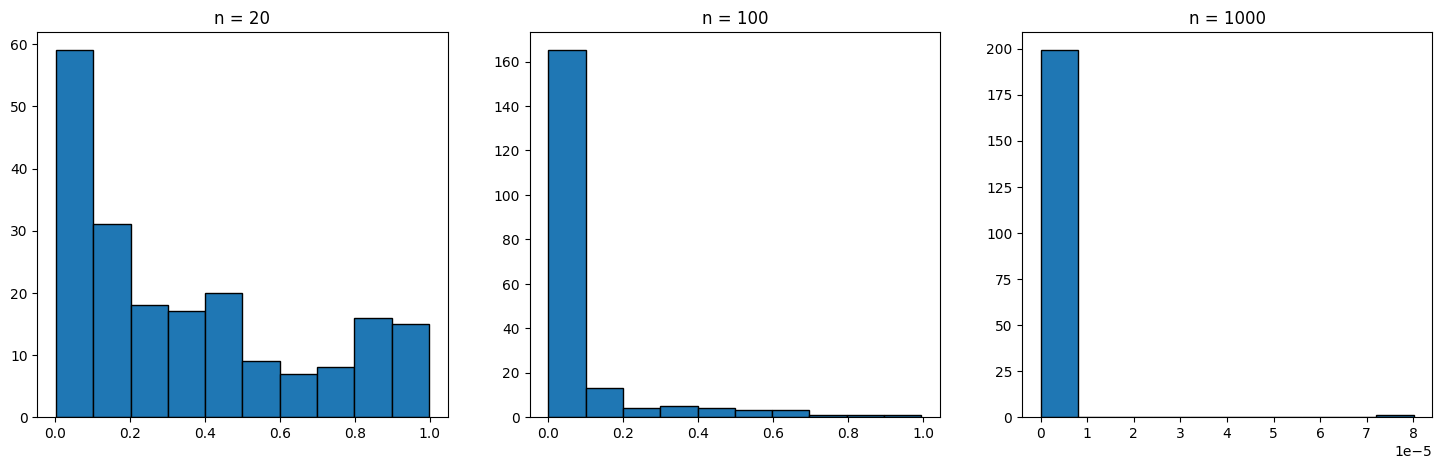

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].hist(p_value_ttest[0], edgecolor='black')
ax[0].set_title("n = 20")

ax[1].hist(p_value_ttest[1], edgecolor='black')
ax[1].set_title("n = 100")

ax[2].hist(p_value_ttest[2], edgecolor='black')
ax[2].set_title("n = 1000")

**Mann-Whitney test**

In [5]:
p_value_mwtest = []
for i in range(len(N)):
    p_value_mwtest_i = []
    for j in range(200):
        data_i = np.random.normal(1, 1, N[i])
        data_j = np.random.normal(2, 4, N[i])
        n_data = [data_i, data_j]

        if i == 0:
            mw_test = st.mannwhitneyu(n_data[0], n_data[1], method="exact")
        else:
            mw_test = st.mannwhitneyu(n_data[0], n_data[1])
        p_value_mwtest_i.append(mw_test.pvalue)
    p_value_mwtest.append(p_value_mwtest_i)

Text(0.5, 1.0, 'n = 1000')

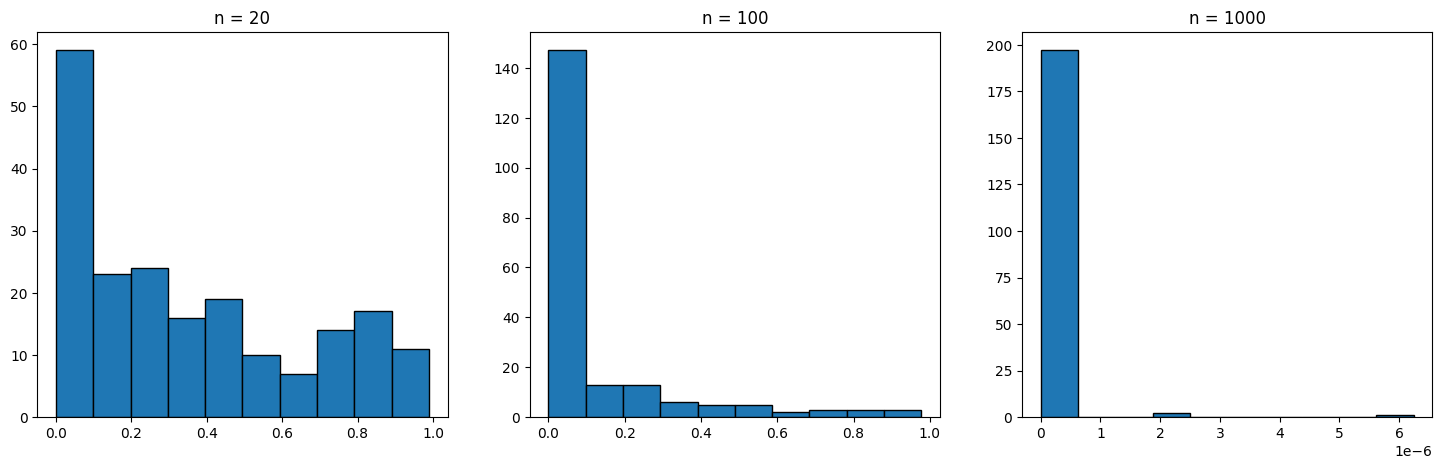

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].hist(p_value_mwtest[0], edgecolor='black')
ax[0].set_title("n = 20")

ax[1].hist(p_value_mwtest[1], edgecolor='black')
ax[1].set_title("n = 100")

ax[2].hist(p_value_mwtest[2], edgecolor='black')
ax[2].set_title("n = 1000")

**Smirnov test**

In [7]:
p_value_stest = []
for i in range(len(N)):
    p_value_stest_i = []
    for j in range(200):
        data_i = np.random.normal(1, 1, N[i])
        data_j = np.random.normal(2, 4, N[i])
        n_data = [data_i, data_j]

        s_test = st.ks_2samp(n_data[0], n_data[1])
        p_value_stest_i.append(s_test.pvalue)
    p_value_stest.append(p_value_stest_i)

Text(0.5, 1.0, 'n = 1000')

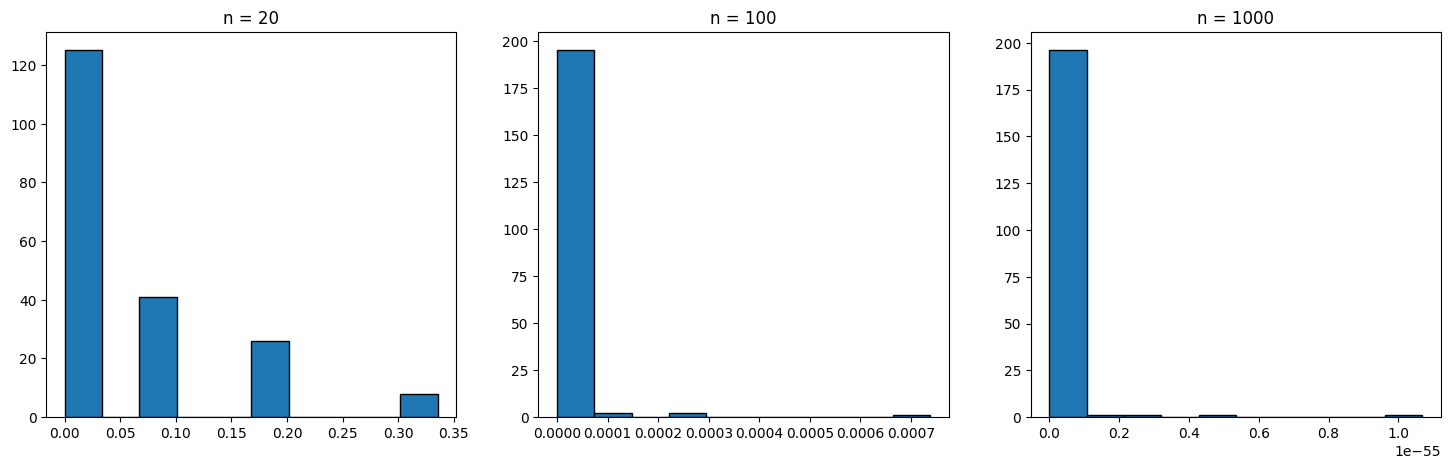

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].hist(p_value_stest[0], edgecolor='black')
ax[0].set_title("n = 20")

ax[1].hist(p_value_stest[1], edgecolor='black')
ax[1].set_title("n = 100")

ax[2].hist(p_value_stest[2], edgecolor='black')
ax[2].set_title("n = 1000")

**Chi-square test**

In [9]:
print(np.log2(20), np.log2(100), np.log2(1000))

4.321928094887363 6.643856189774724 9.965784284662087


In [98]:
deltas = [[1, 1.5, 2], [0.75, 1, 1.5, 2, 2.25, 2.5], [0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75]]

In [99]:
def Get_F_Obs(deltas, X):
    f_obs = []
    
    nu = 0
    for x in X:
            if x < deltas[0]:
                nu += 1
    f_obs.append(nu)

    for i in range(len(deltas) - 1):
        nu = 0
        for x in X:
            if deltas[i] <= x and x < deltas[i + 1]:
                nu += 1
        f_obs.append(nu)

    nu = 0
    for x in X:
        if deltas[-1] <= x:
            nu += 1
    f_obs.append(nu)

    return f_obs

In [114]:
p_value_chi2test = []
for i in range(0, len(N)):
    p_value_chi2test_i = []
    for j in range(200):
        n_data = [np.random.normal(1, 1, N[i]), np.random.normal(2, 4, N[i])]
        observed = [Get_F_Obs(deltas[i], n_data[0]), Get_F_Obs(deltas[i], n_data[1])]
        
        while 0 in observed[0] or 0 in observed[1]:
            n_data = [np.random.normal(1, 1, N[i]), np.random.normal(2, 4, N[i])]
            observed = [Get_F_Obs(deltas[i], n_data[0]), Get_F_Obs(deltas[i], n_data[1])]
        
        chi2_test = st.chi2_contingency(observed)
        p_value_chi2test_i.append(chi2_test[1])
    p_value_chi2test.append(p_value_chi2test_i)

Text(0.5, 1.0, 'n = 1000')

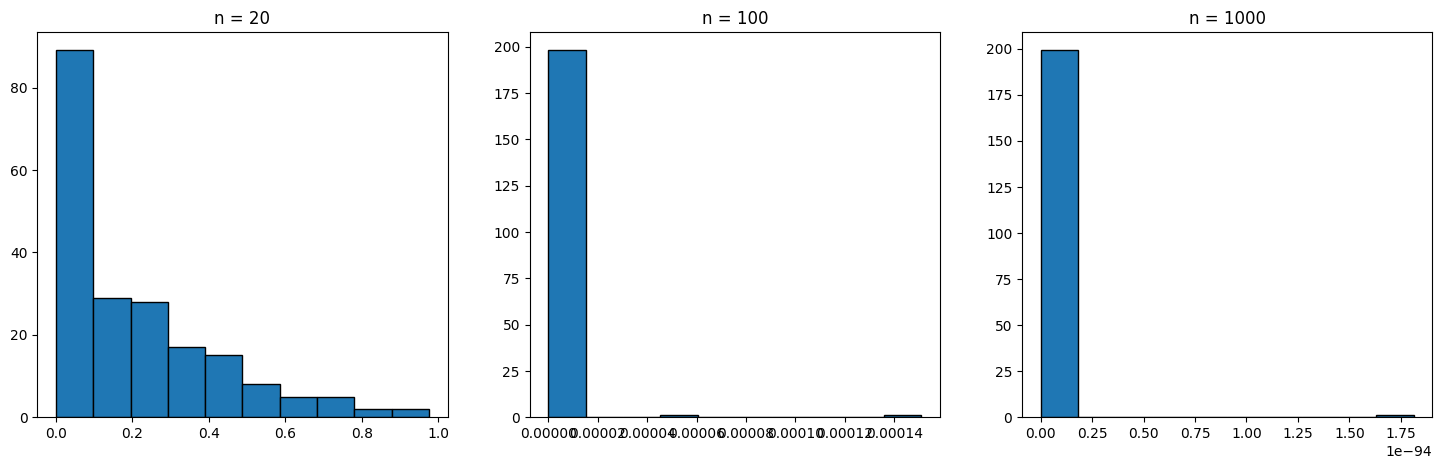

In [116]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].hist(p_value_chi2test[0], edgecolor='black')
ax[0].set_title("n = 20")

ax[1].hist(p_value_chi2test[1], edgecolor='black')
ax[1].set_title("n = 100")

ax[2].hist(p_value_chi2test[2], edgecolor='black')
ax[2].set_title("n = 1000")

**BWS test**

In [117]:
def Get_Ranks(X, Y):
    Z = np.array(list(X) + list(Y))
    Z = list(np.sort(Z))
    R = []
    for x in X:
        R.append(Z.index(x) + 1)
    return np.sort(np.array(R))    

In [118]:
def Bx(X, Y):
    R = Get_Ranks(X, Y)
    n = len(X)
    m = len(Y)

    res = 0
    for i in range(n):
        res += (R[i] - (n + m) * (i + 1) / n)**2 / ((i + 1)/(n + 1) * (1 - (i + 1)/(n + 1)) * m*(n + m)/n)
    res *= 1 / n
    return res

In [119]:
def By(X, Y):
    R = Get_Ranks(Y, X)
    n = len(X)
    m = len(Y)

    res = 0
    for i in range(m):
        res += (R[i] - (n + m) * (i + 1) / m)**2 / ((i + 1)/(m + 1) * (1 - (i + 1)/(m + 1)) * n*(n + m)/m)
    res *= 1 / m
    return res

In [120]:
BWS = []
for i in range(2000):
    bws_data = [np.random.normal(1, 1, 1000), np.random.normal(1, 1, 1000)]
    bws = 1 / 2 * (Bx(bws_data[0], bws_data[1]) + By(bws_data[0], bws_data[1]))
    BWS.append(bws)

In [121]:
def Get_BWS_Pvalue(B):
    arr = list(BWS) + [B]
    arr = list(np.array(np.sort(arr)))
    return 1 - (arr.index(B) + 1) / len(arr)

In [122]:
p_value_bwstest = []
for i in range(len(N)):
    p_value_bwstest_i = []
    for j in range(200):
        n_data = [np.random.normal(1, 1, N[i]), np.random.normal(2, 4, N[i])]
        B = 1 / 2 * (Bx(n_data[0], n_data[1]) + By(n_data[0], n_data[1]))
        
        bws_test = Get_BWS_Pvalue(B)
        p_value_bwstest_i.append(bws_test)
    p_value_bwstest.append(p_value_bwstest_i)

Text(0.5, 1.0, 'n = 1000')

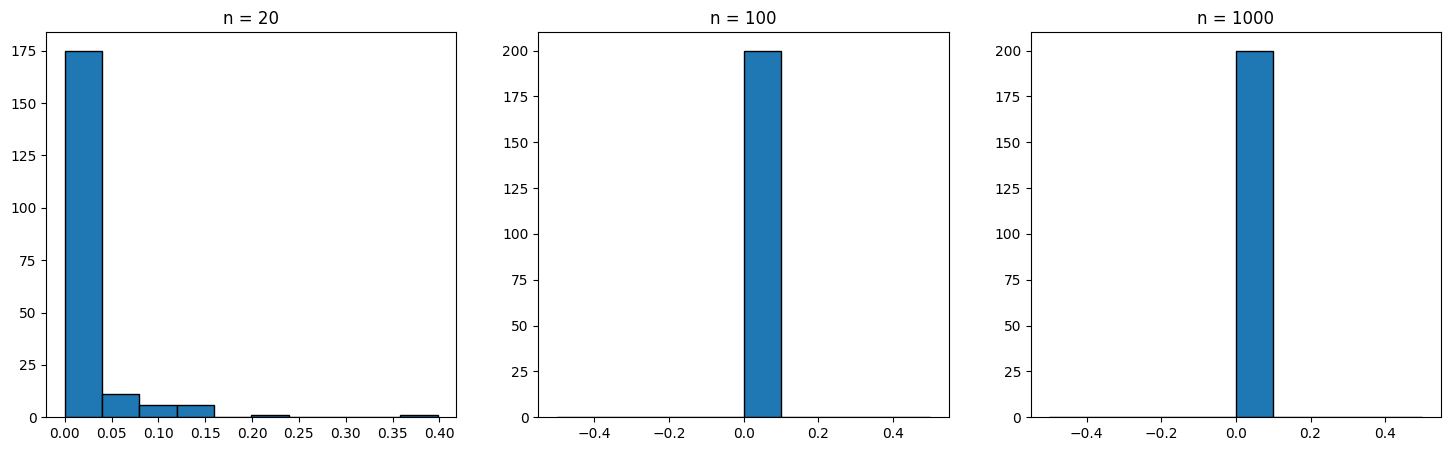

In [123]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].hist(p_value_bwstest[0], edgecolor='black')
ax[0].set_title("n = 20")

ax[1].hist(p_value_bwstest[1], edgecolor='black')
ax[1].set_title("n = 100")

ax[2].hist(p_value_bwstest[2], edgecolor='black')
ax[2].set_title("n = 1000")

In [124]:
ecdf_ttest = []
ecdf_mwtest = []
ecdf_stest = []
ecdf_chi2test = []
ecdf_bwstest = []
for i in range(3):
    ecdf_ttest.append(ECDF(p_value_ttest[i]))
    ecdf_mwtest.append(ECDF(p_value_mwtest[i]))
    ecdf_stest.append(ECDF(p_value_stest[i]))
    ecdf_chi2test.append(ECDF(p_value_chi2test[i]))
    ecdf_bwstest.append(ECDF(p_value_bwstest[i]))

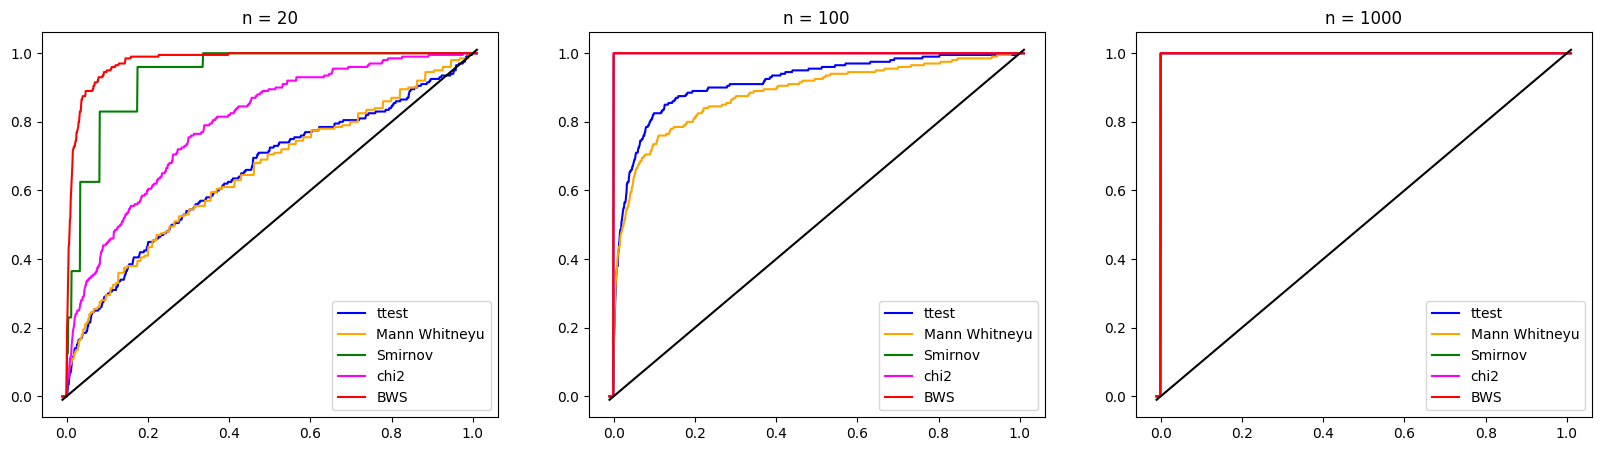

In [125]:
ax = plt.figure(figsize=(20, 5)).subplots(1, 3)
x_ecdf = np.linspace(-0.01, 1.01, 1000)
ax[0].plot(x_ecdf, ecdf_ttest[0](x_ecdf), label='ttest', c='blue')
ax[0].plot(x_ecdf, ecdf_mwtest[0](x_ecdf), label='Mann Whitneyu', c='orange')
ax[0].plot(x_ecdf, ecdf_stest[0](x_ecdf), label='Smirnov', c='green')
ax[0].plot(x_ecdf, ecdf_chi2test[0](x_ecdf), label='chi2', c='magenta')
ax[0].plot(x_ecdf, ecdf_bwstest[0](x_ecdf), label='BWS', c='red')
ax[0].plot(x_ecdf, x_ecdf, c='black')
ax[0].set_title("n = 20")
ax[0].legend()

ax[1].plot(x_ecdf, ecdf_ttest[1](x_ecdf), label='ttest', c='blue')
ax[1].plot(x_ecdf, ecdf_mwtest[1](x_ecdf), label='Mann Whitneyu', c='orange')
ax[1].plot(x_ecdf, ecdf_stest[1](x_ecdf), label='Smirnov', c='green')
ax[1].plot(x_ecdf, ecdf_chi2test[1](x_ecdf), label='chi2', c='magenta')
ax[1].plot(x_ecdf, ecdf_bwstest[1](x_ecdf), label='BWS', c='red')
ax[1].plot(x_ecdf, x_ecdf, c='black')
ax[1].set_title("n = 100")
ax[1].legend()

ax[2].plot(x_ecdf, ecdf_ttest[2](x_ecdf), label='ttest', c='blue')
ax[2].plot(x_ecdf, ecdf_mwtest[2](x_ecdf), label='Mann Whitneyu', c='orange')
ax[2].plot(x_ecdf, ecdf_stest[2](x_ecdf), label='Smirnov', c='green')
ax[2].plot(x_ecdf, ecdf_chi2test[2](x_ecdf), label='chi2', c='magenta')
ax[2].plot(x_ecdf, ecdf_bwstest[2](x_ecdf), label='BWS', c='red')
ax[2].plot(x_ecdf, x_ecdf, c='black')
ax[2].set_title("n = 1000")
ax[2].legend()

**<h1>1.2<h1>**

In [126]:
auto_data = pd.read_csv("Automobile_data.csv")
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [127]:
auto_data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

**MPG**

In [128]:
city_mpg = [auto_data[auto_data["fuel-type"] == 'gas']["city-mpg"], auto_data[auto_data["fuel-type"] == 'diesel']["city-mpg"]]
highway_mpg = [auto_data[auto_data["fuel-type"] == 'gas']["highway-mpg"], auto_data[auto_data["fuel-type"] == 'diesel']["highway-mpg"]]

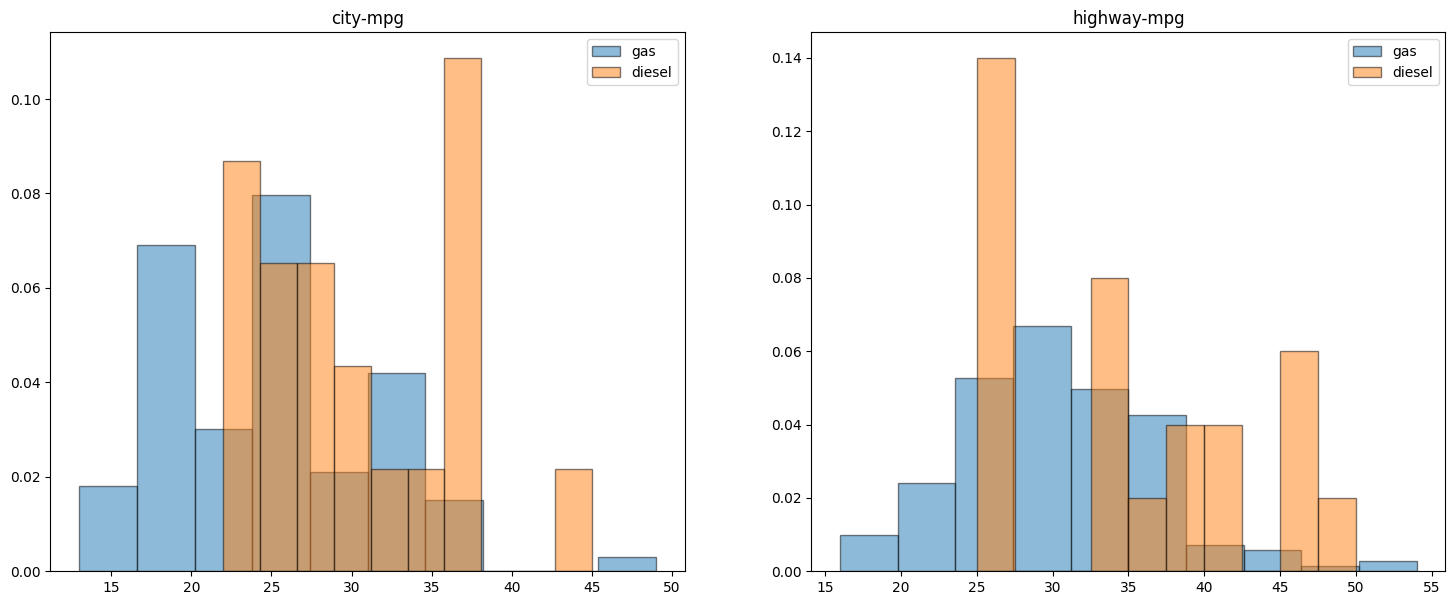

In [129]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

ax[0].hist(city_mpg[0], edgecolor='black', alpha=0.5, label="gas", density=True)
ax[0].hist(city_mpg[1], edgecolor='black', alpha=0.5, label="diesel", density=True)
ax[0].set_title("city-mpg")
ax[0].legend()

ax[1].hist(highway_mpg[0], edgecolor='black', alpha=0.5, label="gas", density=True)
ax[1].hist(highway_mpg[1], edgecolor='black', alpha=0.5, label="diesel", density=True)
ax[1].set_title("highway-mpg")
ax[1].legend()

In [132]:
anderson_city = st.anderson_ksamp(city_mpg)
anderson_highway = st.anderson_ksamp(highway_mpg)
mw_city = st.mannwhitneyu(city_mpg[0], city_mpg[1])
mw_highway = st.mannwhitneyu(highway_mpg[0], highway_mpg[1])
print("city-mpg", anderson_city, mw_city, sep='\n', end='\n\n')
print("highway-mpg", anderson_highway, mw_highway, sep='\n')

city-mpg
Anderson_ksampResult(statistic=7.779007008448875, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)
MannwhitneyuResult(statistic=1010.0, pvalue=0.0008278056661695979)

highway-mpg
Anderson_ksampResult(statistic=4.597543031993922, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.004851463550536232)
MannwhitneyuResult(statistic=1283.5, pvalue=0.024422564832850463)


C:\Users\timo2\AppData\Local\Temp\ipykernel_9108\1175040257.py:1: UserWarning: p-value floored: true value smaller than 0.001
  anderson_city = st.anderson_ksamp(city_mpg)


In [136]:
mw_city = st.mannwhitneyu(city_mpg[0], city_mpg[1], alternative="less")
mw_highway = st.mannwhitneyu(highway_mpg[0], highway_mpg[1], alternative="less")
print("city-mpg", mw_city, sep='\n', end='\n\n')
print("highway-mpg", mw_highway, sep='\n')

city-mpg
MannwhitneyuResult(statistic=1010.0, pvalue=0.00041390283308479896)

highway-mpg
MannwhitneyuResult(statistic=1283.5, pvalue=0.012211282416425231)


**Price**

In [137]:
pr = [auto_data[auto_data["fuel-type"] == 'gas']["price"], auto_data[auto_data["fuel-type"] == 'diesel']["price"]]
price_1 = []
for p in pr[0]:
    if str(p) != '?':
        price_1.append(int(p))
price_2 = []
for p in pr[1]:
    if str(p) != '?':
        price_2.append(int(p))
price = [price_1, price_2]

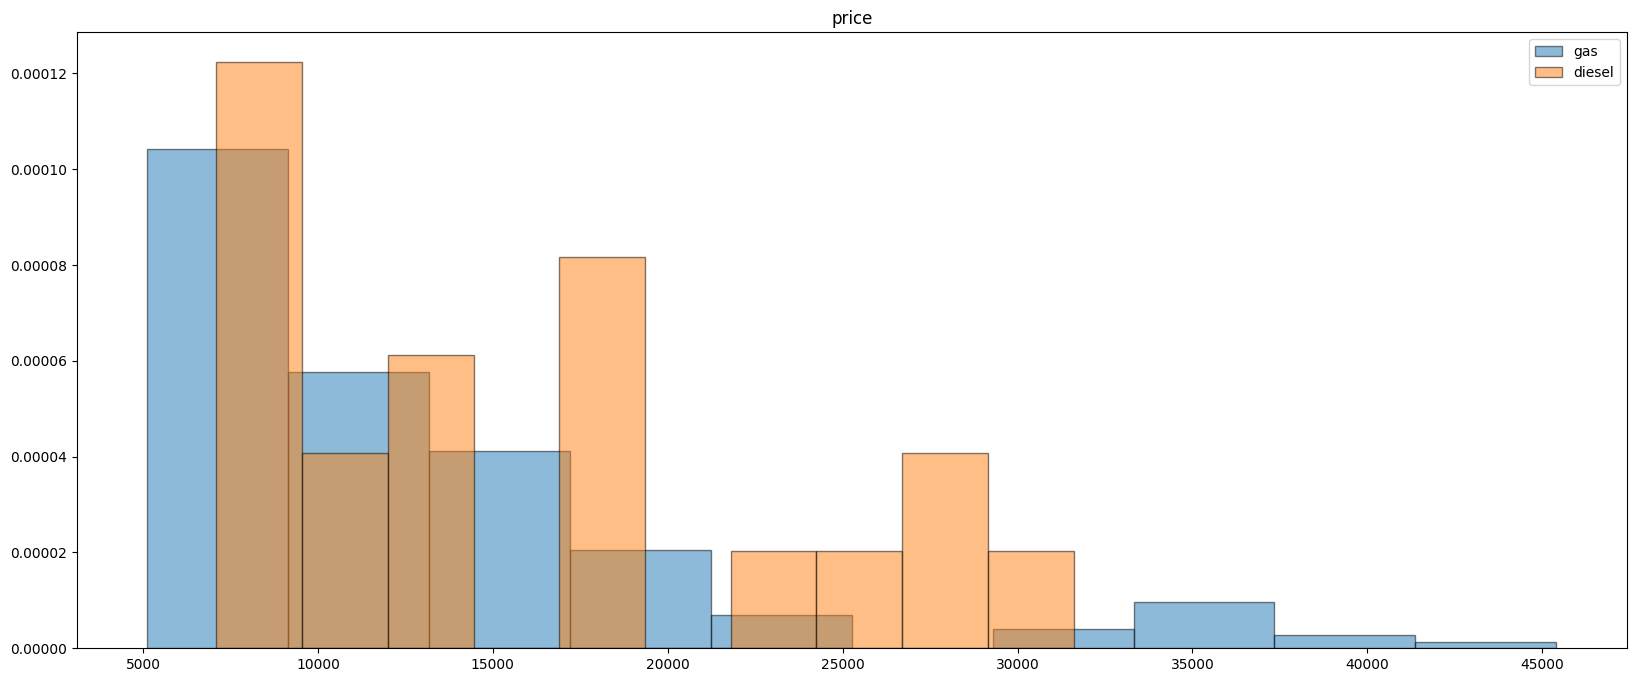

In [138]:
fig = plt.figure(figsize=(20, 8))

plt.hist(price[0], edgecolor='black', alpha=0.5, label="gas", density=True)
plt.hist(price[1], edgecolor='black', alpha=0.5, label="diesel", density=True)
plt.title("price")
plt.legend()

In [139]:
anderson_price = st.anderson_ksamp(price)
mw_price = st.mannwhitneyu(price[0], price[1])
print("price", anderson_price, mw_price, sep='\n')

price
Anderson_ksampResult(statistic=1.9665449080215676, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.05028162254351873)
MannwhitneyuResult(statistic=1305.0, pvalue=0.0409798974040777)


In [142]:
mw_price = st.mannwhitneyu(price[0], price[1], alternative="less")
print("price", mw_price, sep='\n')

price
MannwhitneyuResult(statistic=1305.0, pvalue=0.02048994870203885)


**<h1>1.3<h1>**

In [143]:
cholest_data = pd.read_csv("cholestg.txt", sep='\t')

In [144]:
cholest_data.head()

,patient,group,day,cholest
0,1,1,2.0,270.0
1,2,1,2.0,236.0
2,3,1,2.0,210.0
3,4,1,2.0,142.0
4,5,1,2.0,280.0


In [145]:
cholest_to_day = [list(cholest_data[cholest_data["group"] == 1][cholest_data["day"] == 2.0]["cholest"]), 
                  list(cholest_data[cholest_data["group"] == 1][cholest_data["day"] == 4.0]["cholest"]), 
                  list(cholest_data[cholest_data["group"] == 1][cholest_data["day"] == 14.0]["cholest"])]

C:\Users\timo2\AppData\Local\Temp\ipykernel_9108\2659433065.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cholest_to_day = [list(cholest_data[cholest_data["group"] == 1][cholest_data["day"] == 2.0]["cholest"]),
C:\Users\timo2\AppData\Local\Temp\ipykernel_9108\2659433065.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  list(cholest_data[cholest_data["group"] == 1][cholest_data["day"] == 4.0]["cholest"]),
C:\Users\timo2\AppData\Local\Temp\ipykernel_9108\2659433065.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  list(cholest_data[cholest_data["group"] == 1][cholest_data["day"] == 14.0]["cholest"])]


In [148]:
print(cholest_to_day[0], cholest_to_day[1], cholest_to_day[2], sep='\n')

[270.0, 236.0, 210.0, 142.0, 280.0, 272.0, 160.0, 220.0, 226.0, 242.0, 186.0, 266.0, 206.0, 318.0, 294.0, 282.0, 234.0, 224.0, 276.0, 282.0, 360.0, 310.0, 280.0, 278.0, 288.0, 288.0, 244.0, 236.0]
[218.0, 234.0, 214.0, 116.0, 200.0, 276.0, 146.0, 182.0, 238.0, 288.0, 190.0, 236.0, 244.0, 258.0, 240.0, 294.0, 220.0, 200.0, 220.0, 186.0, 352.0, 202.0, 218.0, 248.0, 278.0, 248.0, 270.0, 242.0]
[156.0, 242.0, nan, 256.0, 142.0, 216.0, 248.0, 168.0, 236.0, 200.0, 264.0, 264.0, 188.0, 182.0, 294.0, 214.0, 198.0, 256.0, 280.0, 204.0]


In [150]:
for el in cholest_to_day[2]:
    if str(el) == "nan":
        cholest_to_day[2].remove(el)

In [151]:
print(list(cholest_to_day[2]))

[156.0, 242.0, 256.0, 142.0, 216.0, 248.0, 168.0, 236.0, 200.0, 264.0, 264.0, 188.0, 182.0, 294.0, 214.0, 198.0, 256.0, 280.0, 204.0]


In [152]:
cholest_control = list(cholest_data[cholest_data["group"] == 2]["cholest"])

In [165]:
cholest_to_day_friedman = [list(cholest_data[cholest_data["group"] == 1][cholest_data["day"] == 2.0]["cholest"]), 
                           list(cholest_data[cholest_data["group"] == 1][cholest_data["day"] == 4.0]["cholest"]), 
                           list(cholest_data[cholest_data["group"] == 1][cholest_data["day"] == 14.0]["cholest"])]

C:\Users\timo2\AppData\Local\Temp\ipykernel_9108\4024544861.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cholest_to_day_friedman = [list(cholest_data[cholest_data["group"] == 1][cholest_data["day"] == 2.0]["cholest"]),
C:\Users\timo2\AppData\Local\Temp\ipykernel_9108\4024544861.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  list(cholest_data[cholest_data["group"] == 1][cholest_data["day"] == 4.0]["cholest"]),
C:\Users\timo2\AppData\Local\Temp\ipykernel_9108\4024544861.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  list(cholest_data[cholest_data["group"] == 1][cholest_data["day"] == 14.0]["cholest"])]


In [169]:
for a, b, c in zip(cholest_to_day_friedman[0], cholest_to_day_friedman[1], cholest_to_day_friedman[2]):
    if str(c) == "nan":
        cholest_to_day_friedman[0].remove(a)
        cholest_to_day_friedman[1].remove(b)
        cholest_to_day_friedman[2].remove(c)

In [170]:
print(cholest_to_day_friedman[0], cholest_to_day_friedman[1], cholest_to_day_friedman[2], sep='\n')

[270.0, 210.0, 160.0, 220.0, 226.0, 186.0, 266.0, 318.0, 294.0, 234.0, 276.0, 282.0, 360.0, 310.0, 280.0, 278.0, 288.0, 244.0, 236.0]
[214.0, 276.0, 182.0, 238.0, 190.0, 236.0, 258.0, 240.0, 220.0, 200.0, 220.0, 186.0, 352.0, 202.0, 218.0, 248.0, 248.0, 270.0, 242.0]
[156.0, 242.0, 256.0, 142.0, 216.0, 248.0, 168.0, 236.0, 200.0, 264.0, 264.0, 188.0, 182.0, 294.0, 214.0, 198.0, 256.0, 280.0, 204.0]


**Cholest to day**

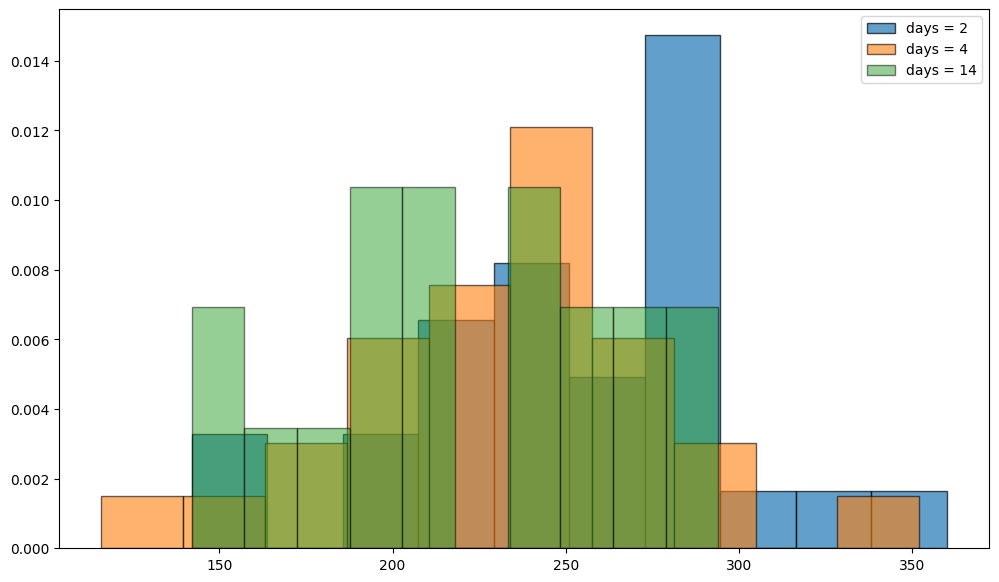

In [171]:
fig = plt.figure(figsize = (12, 7))

plt.hist(cholest_to_day[0], edgecolor='black', alpha=0.7, density=True, label="days = 2")
plt.hist(cholest_to_day[1], edgecolor='black', alpha=0.6, density=True, label="days = 4")
plt.hist(cholest_to_day[2], edgecolor='black', alpha=0.5, density=True, label="days = 14")
plt.legend()

In [180]:
anderson_cholest = st.anderson_ksamp(cholest_to_day)
print(anderson_cholest)

Anderson_ksampResult(statistic=1.9654903159061334, critical_values=array([0.44925884, 1.3052767 , 1.9434184 , 2.57696569, 3.41634856,
       4.07210043, 5.56419101]), significance_level=0.04854045954026805)


In [181]:
mw_cholest = st.mannwhitneyu(cholest_to_day[0], cholest_to_day[1])
print("ksample test for data after 2 and 4 days", mw_cholest.pvalue, '\n', sep='\n')

mw_cholest = st.mannwhitneyu(cholest_to_day[0], cholest_to_day[2])
print("ksample test for data after 2 and 14 days", mw_cholest.pvalue, '\n', sep='\n')

mw_cholest = st.mannwhitneyu(cholest_to_day[1], cholest_to_day[2])
print("ksample test for data after 4 and 14 days", mw_cholest.pvalue, sep='\n')

ksample test for data after 2 and 4 days
0.04638730510547645


ksample test for data after 2 and 14 days
0.019169782310297624


ksample test for data after 4 and 14 days
0.543668099068121


In [182]:
mw_cholest = st.mannwhitneyu(cholest_to_day[0], cholest_to_day[1], alternative="greater")
print("ksample with greatre alternative for data after 2 and 4 days", mw_cholest.pvalue, '\n', sep='\n')

mw_cholest = st.mannwhitneyu(cholest_to_day[0], cholest_to_day[2], alternative="greater")
print("ksample with greatre alternative for data after 2 and 14 days", mw_cholest.pvalue, '\n', sep='\n')

ksample with greatre alternative for data after 2 and 4 days
0.023193652552738225


ksample with greatre alternative for data after 2 and 14 days
0.009584891155148812




In [176]:
friedman_cholest = st.friedmanchisquare(cholest_to_day_friedman[0], cholest_to_day_friedman[1], cholest_to_day_friedman[2])
print("Friedman test", friedman_cholest.pvalue, sep='\n')

Friedman test
0.07585380812713546


In [177]:
wilcoxon_cholest = st.wilcoxon(cholest_to_day_friedman[0], cholest_to_day_friedman[1])
print("Wilcoxon after 2 and 4 days", wilcoxon_cholest.pvalue, '\n', sep='\n')
wilcoxon_cholest = st.wilcoxon(cholest_to_day_friedman[0], cholest_to_day_friedman[2])
print("Wilcoxon after 2 and 14 days", wilcoxon_cholest.pvalue, '\n', sep='\n')
wilcoxon_cholest = st.wilcoxon(cholest_to_day_friedman[1], cholest_to_day_friedman[2])
print("Wilcoxon after 4 and 14 days", wilcoxon_cholest.pvalue, '\n', sep='\n')

Wilcoxon after 2 and 4 days
0.03234100341796875


Wilcoxon after 2 and 14 days
0.036067962646484375


Wilcoxon after 4 and 14 days
0.5948867797851562




In [179]:
wilcoxon_cholest = st.wilcoxon(cholest_to_day_friedman[0], cholest_to_day_friedman[1], alternative="greater")
print("Wilcoxon after 2 and 4 days", wilcoxon_cholest.pvalue, '\n', sep='\n')
wilcoxon_cholest = st.wilcoxon(cholest_to_day_friedman[0], cholest_to_day_friedman[2], alternative="greater")
print("Wilcoxon after 2 and 14 days", wilcoxon_cholest.pvalue, '\n', sep='\n')

Wilcoxon after 2 and 4 days
0.016170501708984375


Wilcoxon after 2 and 14 days
0.018033981323242188




**Cholest 2 days / control**

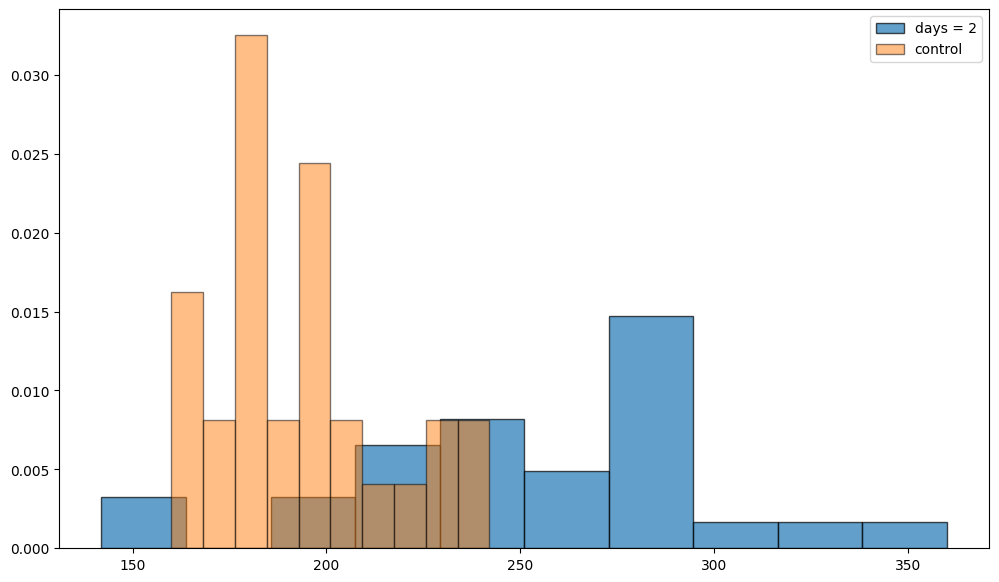

In [183]:
fig = plt.figure(figsize = (12, 7))

plt.hist(cholest_to_day[0], edgecolor='black', alpha=0.7, density=True, label="days = 2")
plt.hist(cholest_control, edgecolor='black', alpha=0.5, density=True, label="control")
plt.legend()

In [185]:
anderson_cholest = st.anderson_ksamp([cholest_to_day[0], cholest_control])
print(anderson_cholest, '\n')
mw_cholest = st.mannwhitneyu(cholest_to_day[0], cholest_control)
print(mw_cholest)

Anderson_ksampResult(statistic=16.78520980710438, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001) 

MannwhitneyuResult(statistic=734.0, pvalue=1.0566398374709994e-06)


C:\Users\timo2\AppData\Local\Temp\ipykernel_9108\1838002566.py:1: UserWarning: p-value floored: true value smaller than 0.001
  anderson_cholest = st.anderson_ksamp([cholest_to_day[0], cholest_control])


In [186]:
mw_cholest = st.mannwhitneyu(cholest_to_day[0], cholest_control, alternative='greater')
print(mw_cholest)

MannwhitneyuResult(statistic=734.0, pvalue=5.283199187354997e-07)


**Cholest 14 days / control**

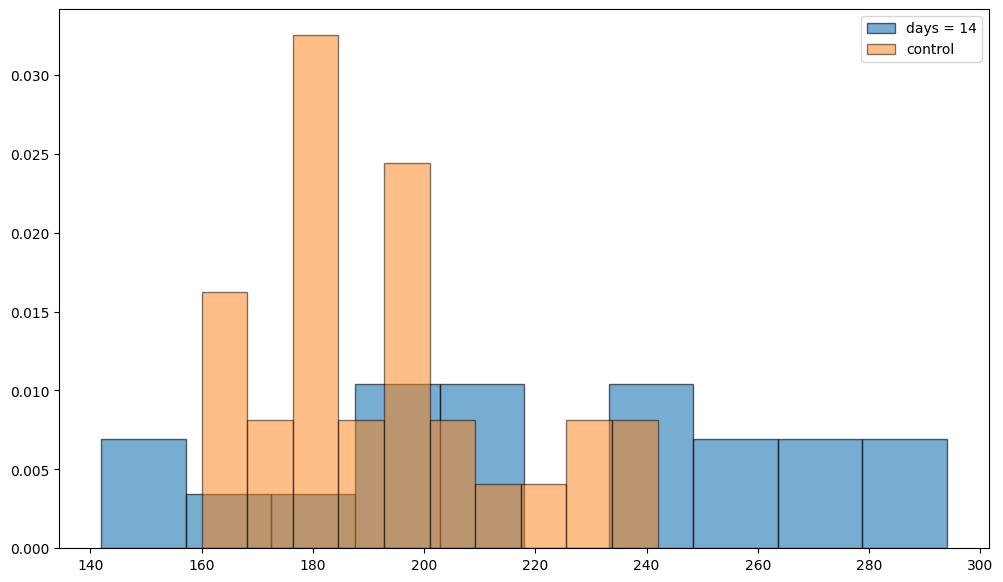

In [187]:
fig = plt.figure(figsize = (12, 7))

plt.hist(cholest_to_day[2], edgecolor='black', alpha=0.6, density=True, label="days = 14")
plt.hist(cholest_control, edgecolor='black', alpha=0.5, density=True, label="control")
plt.legend()

In [188]:
anderson_cholest = st.anderson_ksamp([cholest_to_day[2], cholest_control])
print(anderson_cholest, '\n')
mw_cholest = st.mannwhitneyu(cholest_to_day[2], cholest_control)
print(mw_cholest)

Anderson_ksampResult(statistic=5.239877715033902, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.0028481047482679218) 

MannwhitneyuResult(statistic=409.5, pvalue=0.01083412815920308)


In [190]:
mw_cholest = st.mannwhitneyu(cholest_to_day[2], cholest_control, alternative='greater')
print(mw_cholest)

MannwhitneyuResult(statistic=409.5, pvalue=0.00541706407960154)


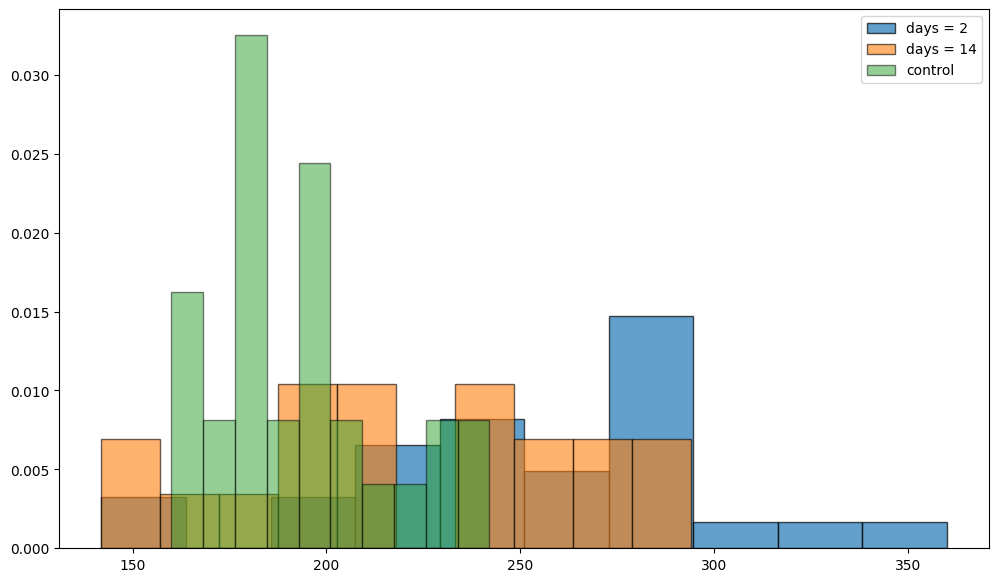

In [191]:
fig = plt.figure(figsize = (12, 7))

plt.hist(cholest_to_day[0], edgecolor='black', alpha=0.7, density=True, label="days = 2")
plt.hist(cholest_to_day[2], edgecolor='black', alpha=0.6, density=True, label="days = 14")
plt.hist(cholest_control, edgecolor='black', alpha=0.5, density=True, label="control")
plt.legend()